# Classification Methods: Logistic Regression and Random Forest
### Example: Classifying Irises by Their Measurements
### Instructor: Steve Walsh

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn.linear_model as skl_lm
import sklearn.metrics as skl_m
import sklearn.model_selection as skl_ms
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

### Read in the dataset

The `iris.csv` file is available [here.](https://drive.google.com/file/d/1DzbLMgXZUpSgngDPyfsPMnnOVyMTfx8a/view?usp=sharing)

In [ ]:
# Read in the dataset
iris = pd.read_csv("iris.csv")

# Print column names
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
# Define the variety as y, and all 4 measurements as X
y = iris['variety']
X = iris.drop(['variety'], axis=1)
X.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plot counts for y

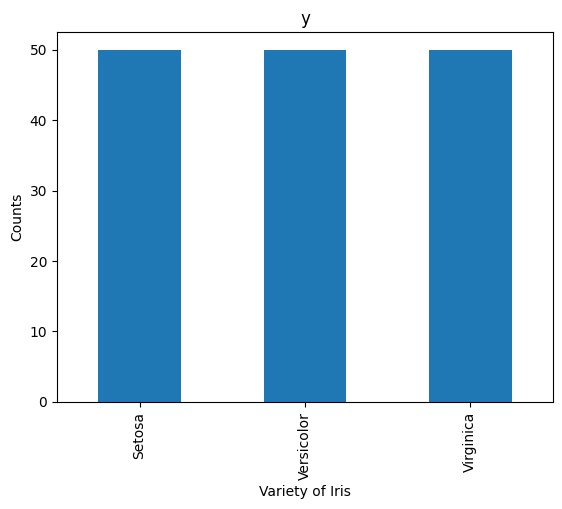

In [ ]:
# Make a bar chart for y
y.value_counts().plot(kind="bar")

# Add title and axis names
plt.title('y')
plt.xlabel('Variety of Iris')
plt.ylabel('Counts')
plt.show()

We can see that this dataset is balanced, in the sense that there are 50 of each type of flower. There are a total of 150 flowers.

<font color="orange">Now, our question is: can we predict $y$ (the variety of iris), based on the covariates contained in $X$ (heights and widths of both the petals and sepals)?</font>

### Data preprocessing

In [ ]:
# Split up train and test sets
# We will do 70% to train the model, and 30% to test/validate the model
X_train, X_test, y_train, y_test = skl_ms.train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# See how many y's are in the test set
len(y_test)

45

<font color="orange">So, we will train the model with 70% of the data (105 rows), and test on the remaining 30% (45 rows).</font>

### Fit a logistic regression model

In [ ]:
# Fit the logistic regression model
logit_mod = skl_lm.LogisticRegression(max_iter=5000, C=1e100, solver="newton-cg")
logit_mod.fit(X_train, y_train)

# Assess the accuracy of the fitted model on the test set
logit_mod.score(X_test, y_test)

0.9555555555555556

# Assessing Model Performance

### We can't create an ROC curve for this problem

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. <font color="orange">Note, we *cannot* make an ROC curve here, because this is multiclass classification.</font> If we have only two categories, we can make this plot. But, we have three this time: virginica, versicolor, and setosa.

### Create a confusion matrix

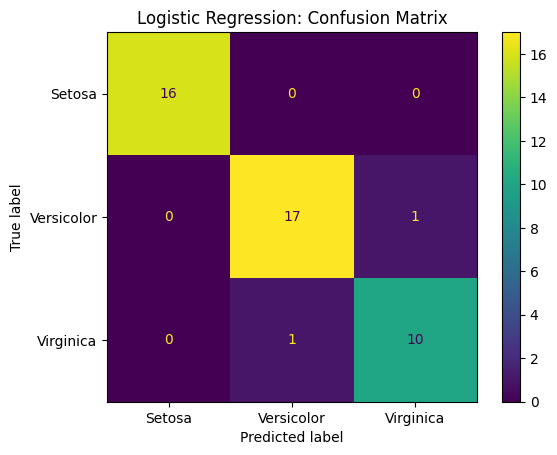

In [ ]:
# Make a confusion matrix
skl_m.ConfusionMatrixDisplay.from_estimator(logit_mod, X_test, y_test)
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

So, of the 45 irises in the test set, only two of them are misclassified! Not bad!

# Do a Random Forest model instead

<font color="red"> Fit a random forest model.</font>

In [ ]:
# Fit a random forest model
# (add two lines of code below; look at the Banking example for help)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

<font color="red"> Assess the accuracy of the random forest model.</font>

In [ ]:
# Assess the accuracy of the fitted model on the test set
# (one line of code; look at the Banking example for help)
rf.score(X_test, y_test)

0.9777777777777777

<font color="red"> Make a Confusion Matrix plot for the random forest model.</font>

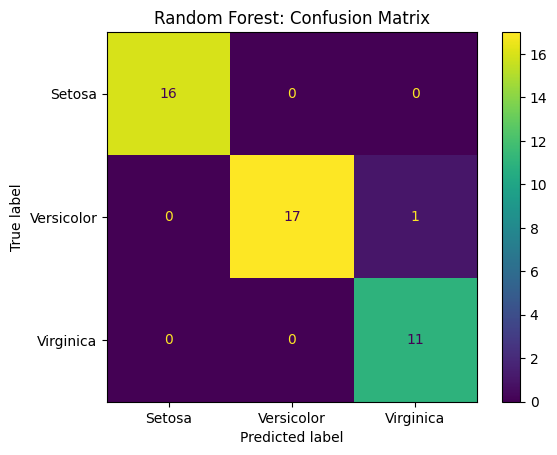

In [ ]:
# Make a confusion matrix
# (three line of code; look at the Banking example for help)
skl_m.ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest: Confusion Matrix")
plt.show()



Upon comparing the results between the logistic regression model and the random forest model, we see that the random forest does a slightly better job in terms of correctly classifying the individuals in the test set. We drop down from two to only one misclassification. This is a pretty easy problem, but random forest does do better than logistic regression here as well!